B    357
M    212
Name: diagnosis, dtype: int64


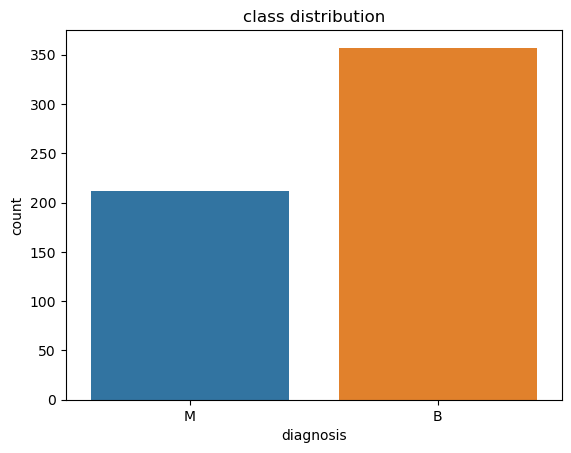

                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.

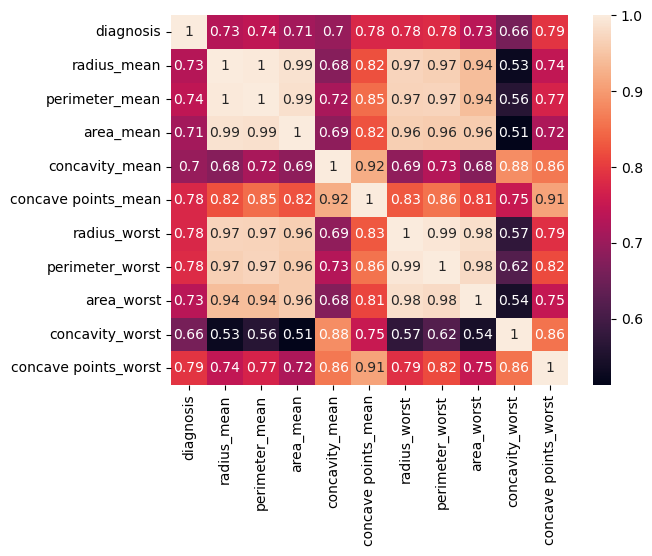

Fitting 5 folds for each of 72 candidates, totalling 360 fits


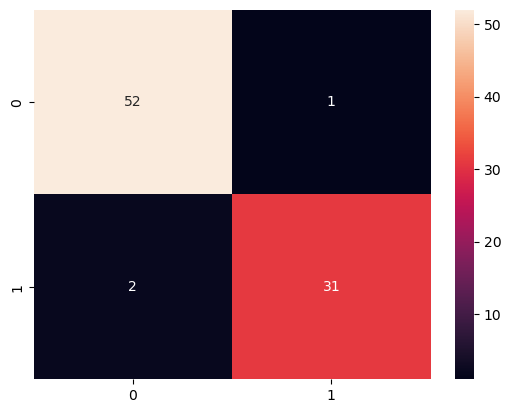

Best hyperparameters: {'C': 16, 'gamma': 0.1, 'kernel': 'rbf'}
Best mean CV accuracy: 0.9648410652920962
The accuracy of the model = 0.965
Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\realragnvaldr\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 72 is smaller than n_iter=100. Running 72 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


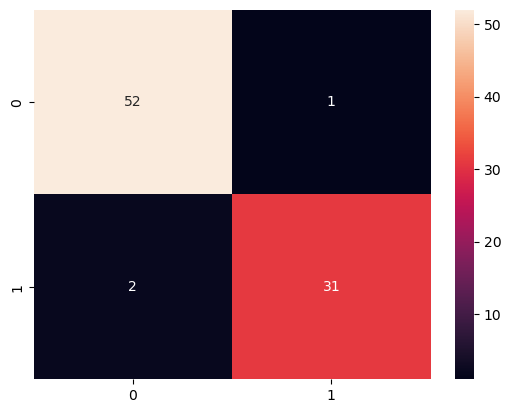

Best hyperparameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 16}
Best mean CV accuracy: 0.9648410652920962
The accuracy of the model = 0.965
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candi

C:\Users\realragnvaldr\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\realragnvaldr\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

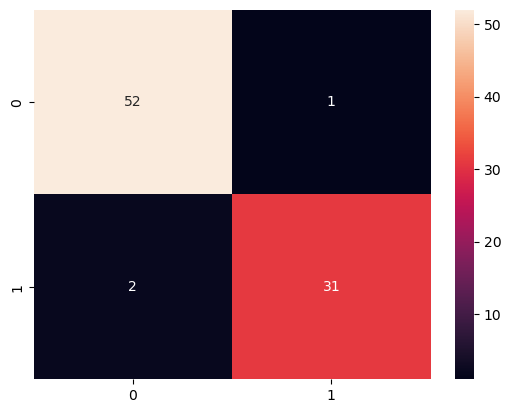

Best hyperparameters: OrderedDict([('C', 9.594706560427545), ('gamma', 0.1), ('kernel', 'rbf')])
Best mean CV accuracy: 0.958655498281787
The accuracy of the model = 0.965


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer


# --------Now load in the dataset with Pandas-----------

df = pd.read_csv('Datasets/BreastCancerDataset.csv')
df = df.drop('Unnamed: 32', axis=1)
del df["id"]

# ----------Plot proportion of the labels --------------

print(df.diagnosis.value_counts())
sns.countplot(x=df['diagnosis']).set_title('class distribution')
plt.show()

# ---------Best Features -------------------------------
df.diagnosis = df.diagnosis.map({'M':1,'B':0})
corr_matrix = df.corr()
print(corr_matrix)
threshold = 0.6
corr_features = list(corr_matrix.columns[np.abs(corr_matrix['diagnosis'])>=threshold])
print(corr_features)
high_corr_matrix = corr_matrix.loc[:,corr_features].loc[corr_features,:]

sns.heatmap(high_corr_matrix, annot=True)
plt.show()

# -------------Split Dataset to train and Test ---------

train, test = train_test_split(df[corr_features], test_size=0.15, random_state=31)
X_train, y_train = train.iloc[:,1:].to_numpy(), train.iloc[:,0].to_numpy()
X_test, y_test = test.iloc[:,1:].to_numpy(), test.iloc[:,0].to_numpy() # We do not touch this until we finish our modeling

# -----------------Scaleing the Features----------------

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# define the parameter space for grid search and randomized search
param_space_grid = {
    'C': [.25, 1, 4, 16, 64, 256],
    'gamma': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
}

# define parameter space for Bayesian search (same ranges, but need to use different data types)
param_space_Bayes = {
    'C': Real(.25, 256, prior='log-uniform'),
    'gamma': Real(.1, 100, prior='log-uniform'),
    'kernel': Categorical(['linear', 'poly', 'rbf']),
}

# perform optimizations using different methods
verbosity_level = 1
for method in ['gridsearch', 'randomsearch', 'bayessearch']:

    if method == 'gridsearch':
        search = GridSearchCV(SVC(class_weight='balanced'), param_space_grid, cv=5, verbose=verbosity_level)
    elif method == 'randomsearch':
        search = RandomizedSearchCV(SVC(class_weight='balanced'), param_space_grid, cv=5, n_iter=100, verbose=verbosity_level)
    elif method == 'bayessearch':
        search = BayesSearchCV(SVC(class_weight='balanced'), param_space_Bayes, cv=5, n_iter=100, verbose=verbosity_level)
        
    # fit
    search.fit(X_train, y_train)

    # evaluate the best model on the testing set
    best_svm = search.best_estimator_
    y_pred = best_svm.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm,annot=True)
    plt.show()

    # print the best hyperparameters and the corresponding mean squared error
    print('Best hyperparameters:', search.best_params_)
    print('Best mean CV accuracy:', search.best_score_)
    acc = round(accuracy_score(y_test, y_pred), 3)
    print('The accuracy of the model =', acc)


In [2]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
